<a href="https://colab.research.google.com/github/Ishita95-harvad/Commodity-Price-Data-2015-2025-/blob/main/Synthetic_Commodity_Price_Data_(2015_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Synthetic Commodity Price Data (2015-2025)**
Daily Commodity Prices with Market Sentiment & Economic Indicators

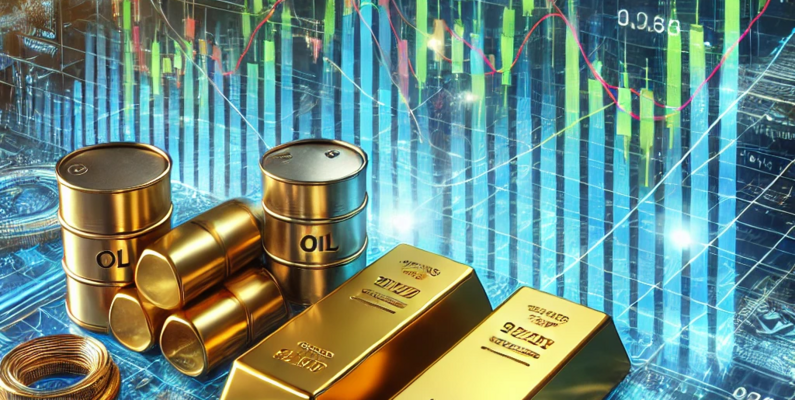

## Data loading

### Subtask:
Load the "commodity_prices.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "commodity_prices.csv" file into a pandas DataFrame and display its first few rows and shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('commodity_prices.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'commodity_prices.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'commodity_prices.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'commodity_prices.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Date,Commodity,Open,High,Low,Close,Volume,Market_Sentiment,GDP_Growth,Inflation,Interest_Rates
0,2015-01-01,Gold,998.11,998.46,997.80,998.18,38403,-0.61,2.25,1.12,4.05
1,2015-01-01,Silver,809.49,812.67,805.96,808.97,42850,0.47,2.25,1.12,4.05
2,2015-01-01,Crude Oil,86.13,87.94,83.44,85.05,86981,0.38,2.25,1.12,4.05
3,2015-01-01,Natural Gas,1817.05,1817.32,1816.17,1816.25,93167,0.70,2.25,1.12,4.05
4,2015-01-01,Copper,985.28,989.37,982.19,984.04,5090,0.07,2.25,1.12,4.05


(18270, 11)


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Examine data types, missing values, and generate descriptive statistics for numerical and categorical features. Visualize data distributions using histograms, box plots, and bar charts.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              18270 non-null  object 
 1   Commodity         18270 non-null  object 
 2   Open              18270 non-null  float64
 3   High              18270 non-null  float64
 4   Low               18270 non-null  float64
 5   Close             18270 non-null  float64
 6   Volume            18270 non-null  int64  
 7   Market_Sentiment  18270 non-null  float64
 8   GDP_Growth        18270 non-null  float64
 9   Inflation         18270 non-null  float64
 10  Interest_Rates    18270 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 1.5+ MB
None
Date                0.0
Commodity           0.0
Open                0.0
High                0.0
Low                 0.0
Close               0.0
Volume              0.0
Market_Sentiment    0.0
GDP_Growth          0

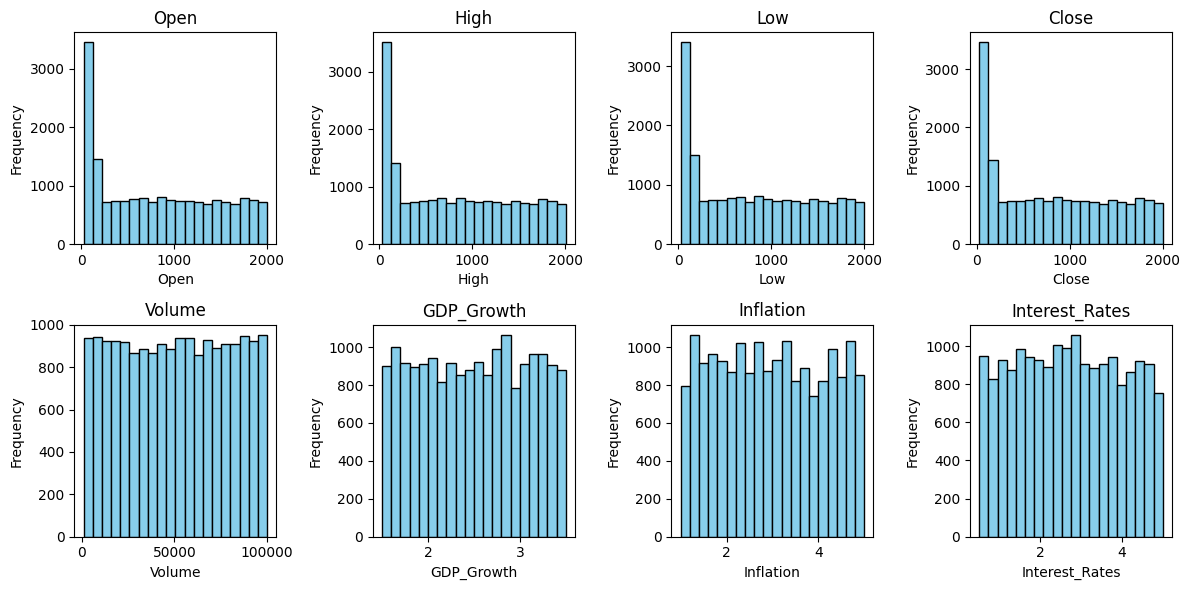

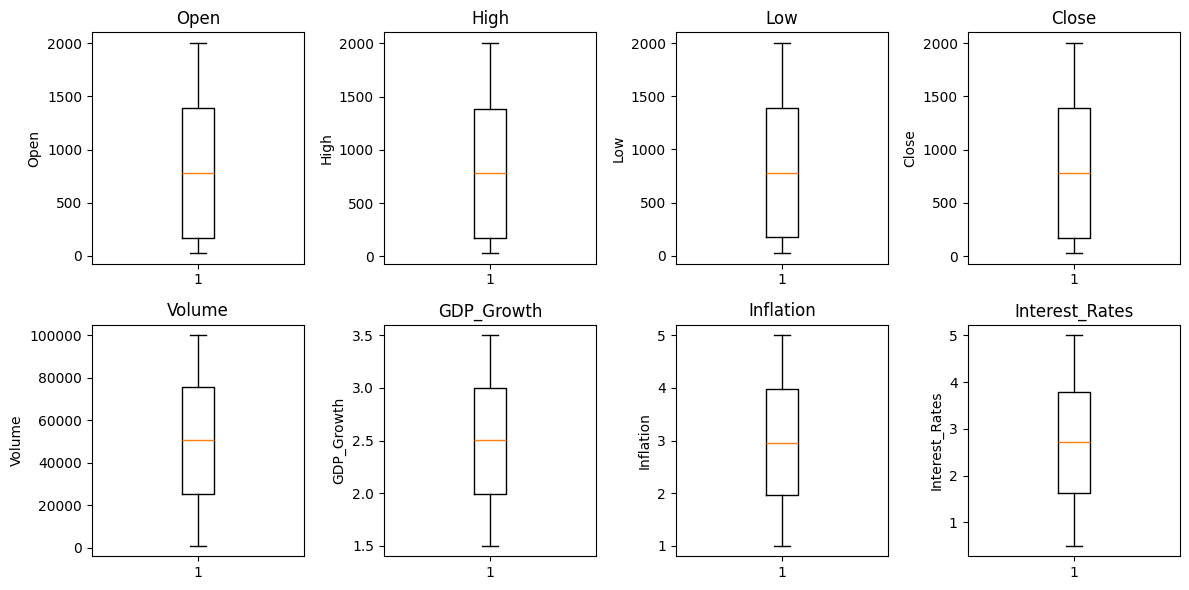

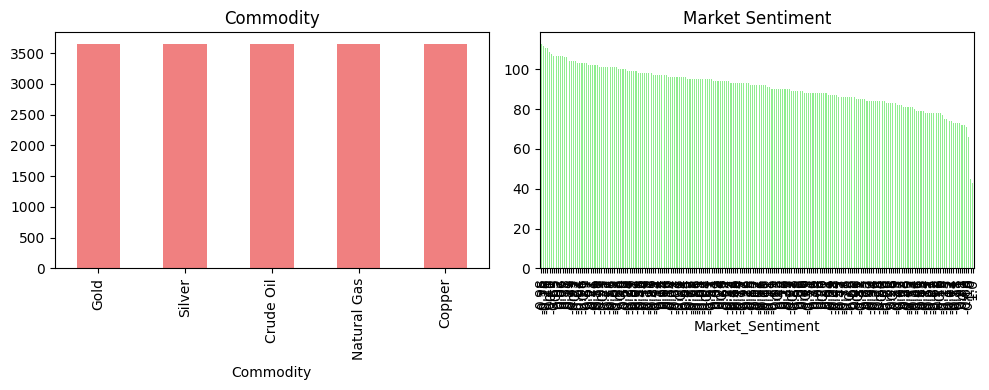

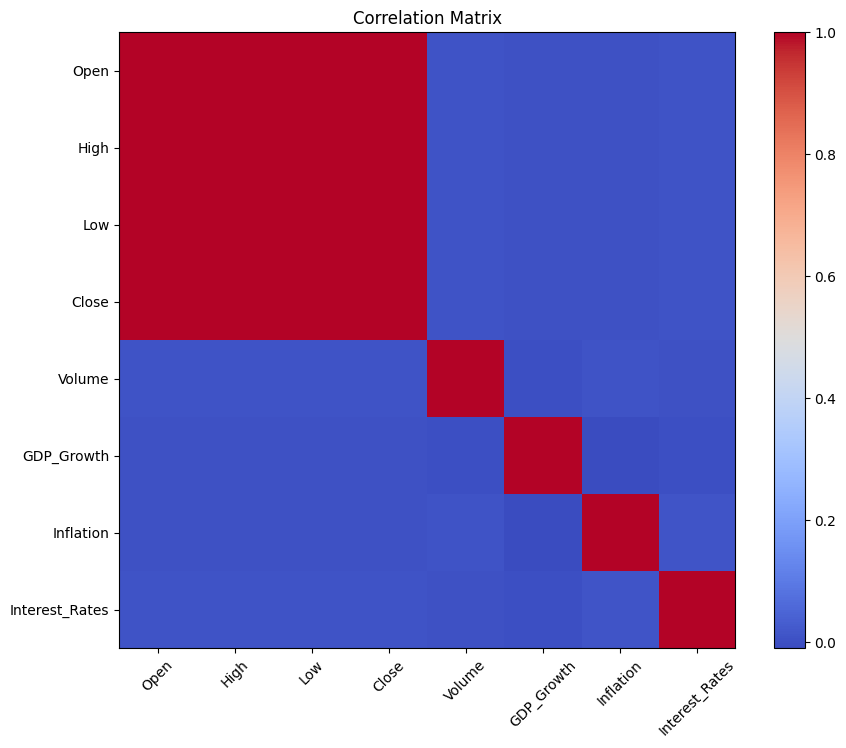

In [2]:
# Check data types and missing values
print(df.info())
print(df.isnull().sum() / len(df) * 100)

# Summarize numerical features
print(df.describe())

# Analyze categorical features
for col in ['Commodity', 'Market_Sentiment']:  # Example categorical columns
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

import matplotlib.pyplot as plt

# Visualize numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP_Growth', 'Inflation', 'Interest_Rates']):
    plt.subplot(2, 4, i + 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(['Open', 'High', 'Low', 'Close', 'Volume', 'GDP_Growth', 'Inflation', 'Interest_Rates']):
    plt.subplot(2, 4, i + 1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.ylabel(col)
plt.tight_layout()
plt.show()


# Visualize categorical features
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['Commodity'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Commodity')
plt.subplot(1, 2, 2)
df['Market_Sentiment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Market Sentiment')
plt.tight_layout()
plt.show()

# Initial correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'GDP_Growth', 'Inflation', 'Interest_Rates']].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Handle missing values, outliers, data types, and duplicates in the dataframe `df`.



In [3]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - No missing values found in the initial exploration
# If there were missing values in 'Volume', I would impute them with the median due to potential outliers.
# For other numerical features, I would use the mean, and for categorical features, the mode.

# Outlier treatment
def cap_outliers(series, lower_percentile=1, upper_percentile=99):
    lower_bound = series.quantile(lower_percentile / 100)
    upper_bound = series.quantile(upper_percentile / 100)
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'GDP_Growth', 'Inflation', 'Interest_Rates']:
    df[col] = cap_outliers(df[col])

# Data Type Handling
df['Date'] = pd.to_datetime(df['Date'])

# Duplicate Removal
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
if duplicates.sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"Duplicate rows removed. New shape: {df.shape}")

print(df.info())
display(df.head())

Date                0
Commodity           0
Open                0
High                0
Low                 0
Close               0
Volume              0
Market_Sentiment    0
GDP_Growth          0
Inflation           0
Interest_Rates      0
dtype: int64
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              18270 non-null  datetime64[ns]
 1   Commodity         18270 non-null  object        
 2   Open              18270 non-null  float64       
 3   High              18270 non-null  float64       
 4   Low               18270 non-null  float64       
 5   Close             18270 non-null  float64       
 6   Volume            18270 non-null  float64       
 7   Market_Sentiment  18270 non-null  float64       
 8   GDP_Growth        18270 non-null  float64       
 9   Inflation

,Date,Commodity,Open,High,Low,Close,Volume,Market_Sentiment,GDP_Growth,Inflation,Interest_Rates
0,2015-01-01,Gold,998.11,998.46,997.80,998.18,38403.0,-0.61,2.25,1.12,4.05
1,2015-01-01,Silver,809.49,812.67,805.96,808.97,42850.0,0.47,2.25,1.12,4.05
2,2015-01-01,Crude Oil,86.13,87.94,83.44,85.05,86981.0,0.38,2.25,1.12,4.05
3,2015-01-01,Natural Gas,1817.05,1817.32,1816.17,1816.25,93167.0,0.70,2.25,1.12,4.05
4,2015-01-01,Copper,985.28,989.37,982.19,984.04,5090.0,0.07,2.25,1.12,4.05


## Data wrangling

### Subtask:
Prepare the data for analysis and visualization.


**Reasoning**:
Create new features, convert the 'Date' column to datetime format, handle data type inconsistencies, and potentially drop irrelevant columns as per the instructions.



In [4]:
# Feature Engineering
df['Daily_Price_Change'] = df['Close'] - df['Open']
df['Close_Price_7D_MA'] = df.groupby('Commodity')['Close'].rolling(window=7, min_periods=1).mean().reset_index(0, drop=True)

# Convert 'Date' to datetime (already done in data cleaning)

# Data Type Handling (check and convert if needed)
for col in ['Open', 'High', 'Low', 'Close', 'Volume', 'GDP_Growth', 'Inflation', 'Interest_Rates']:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = pd.to_numeric(df[col], errors='coerce')

#Check for any remaining inconsistencies:
print(df.info())

# Optional: Drop irrelevant columns (if any) - No columns seem irrelevant at this point
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                18270 non-null  datetime64[ns]
 1   Commodity           18270 non-null  object        
 2   Open                18270 non-null  float64       
 3   High                18270 non-null  float64       
 4   Low                 18270 non-null  float64       
 5   Close               18270 non-null  float64       
 6   Volume              18270 non-null  float64       
 7   Market_Sentiment    18270 non-null  float64       
 8   GDP_Growth          18270 non-null  float64       
 9   Inflation           18270 non-null  float64       
 10  Interest_Rates      18270 non-null  float64       
 11  Daily_Price_Change  18270 non-null  float64       
 12  Close_Price_7D_MA   18270 non-null  float64       
dtypes: datetime64[ns](1), float64(11), object(1)
m

,Date,Commodity,Open,High,Low,Close,Volume,Market_Sentiment,GDP_Growth,Inflation,Interest_Rates,Daily_Price_Change,Close_Price_7D_MA
0,2015-01-01,Gold,998.11,998.46,997.80,998.18,38403.0,-0.61,2.25,1.12,4.05,0.07,998.18
1,2015-01-01,Silver,809.49,812.67,805.96,808.97,42850.0,0.47,2.25,1.12,4.05,-0.52,808.97
2,2015-01-01,Crude Oil,86.13,87.94,83.44,85.05,86981.0,0.38,2.25,1.12,4.05,-1.08,85.05
3,2015-01-01,Natural Gas,1817.05,1817.32,1816.17,1816.25,93167.0,0.70,2.25,1.12,4.05,-0.80,1816.25
4,2015-01-01,Copper,985.28,989.37,982.19,984.04,5090.0,0.07,2.25,1.12,4.05,-1.24,984.04


## Data visualization

### Subtask:
Visualize the key trends and relationships within the prepared commodity price data.


**Reasoning**:
Visualize the key trends and relationships within the commodity price data using line plots, heatmaps, histograms, and scatter plots as specified in the instructions.



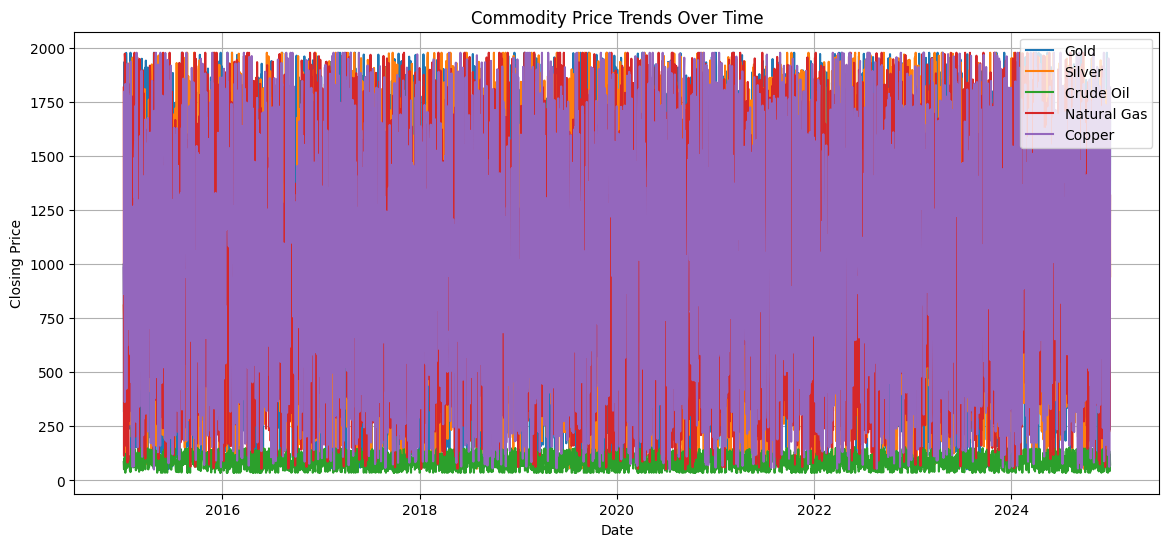

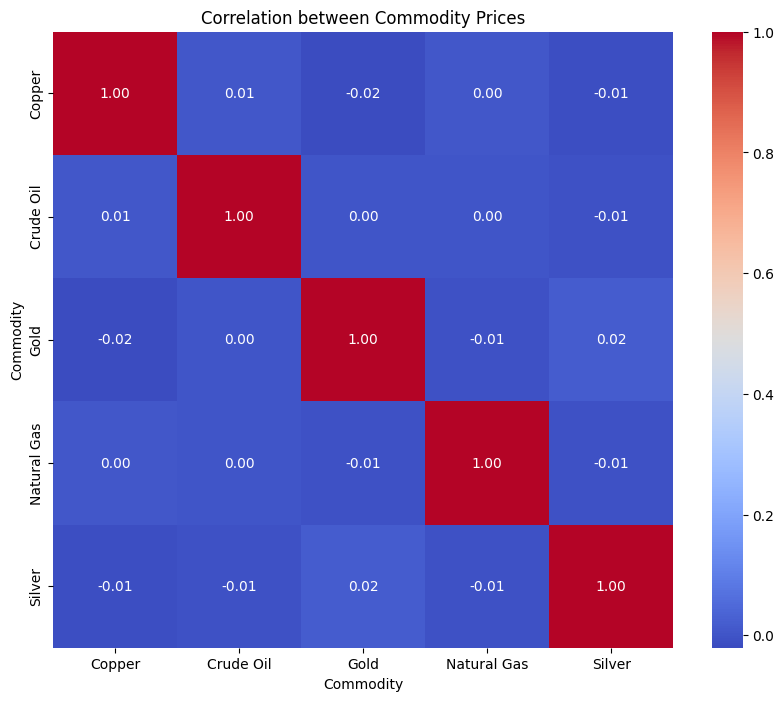

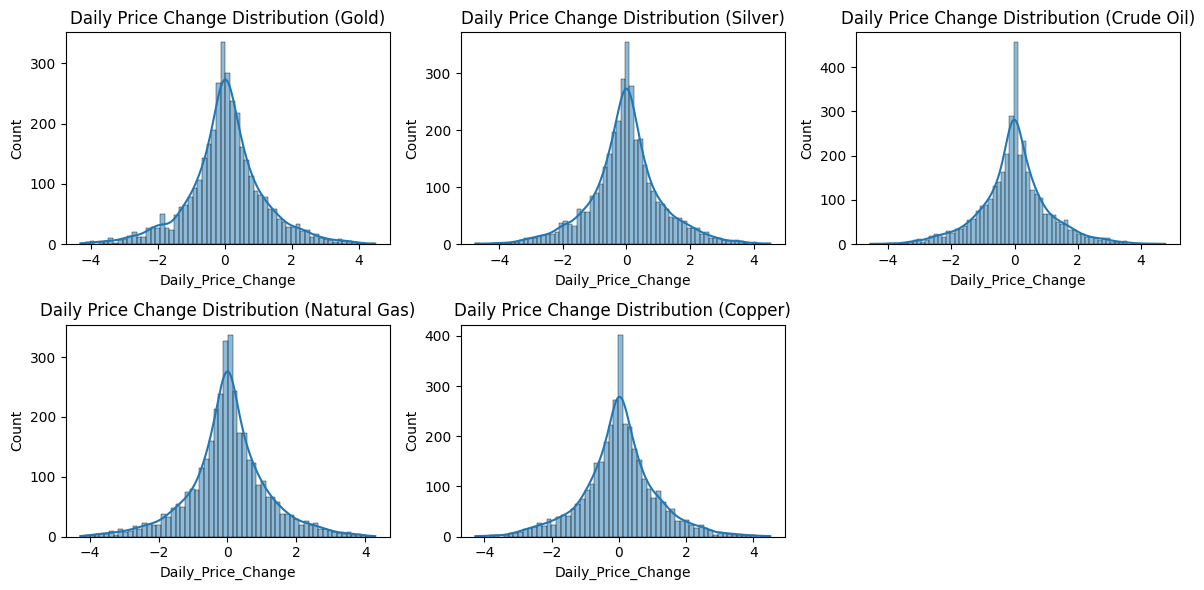

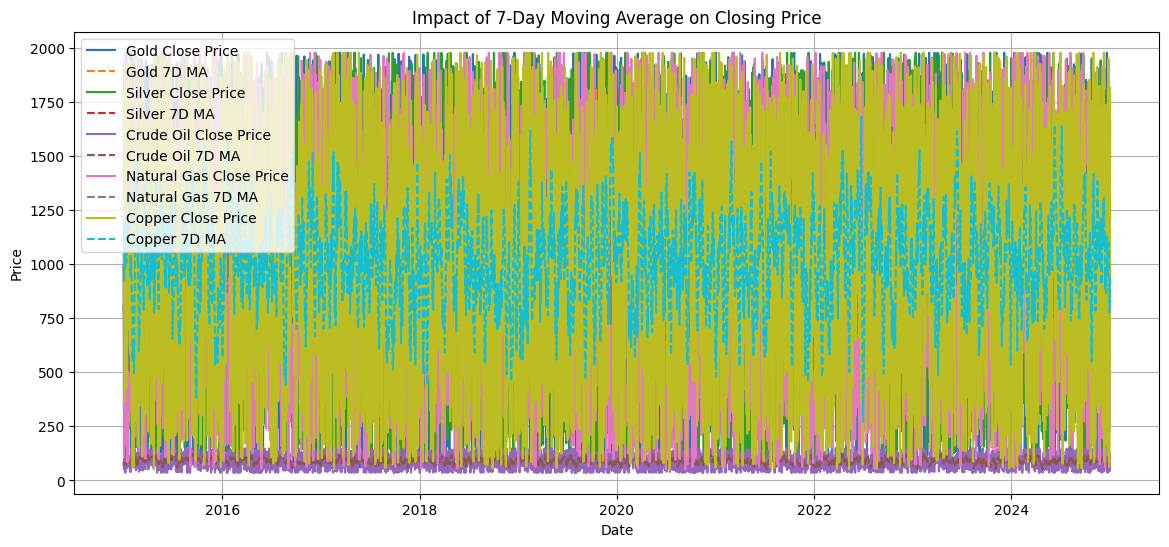

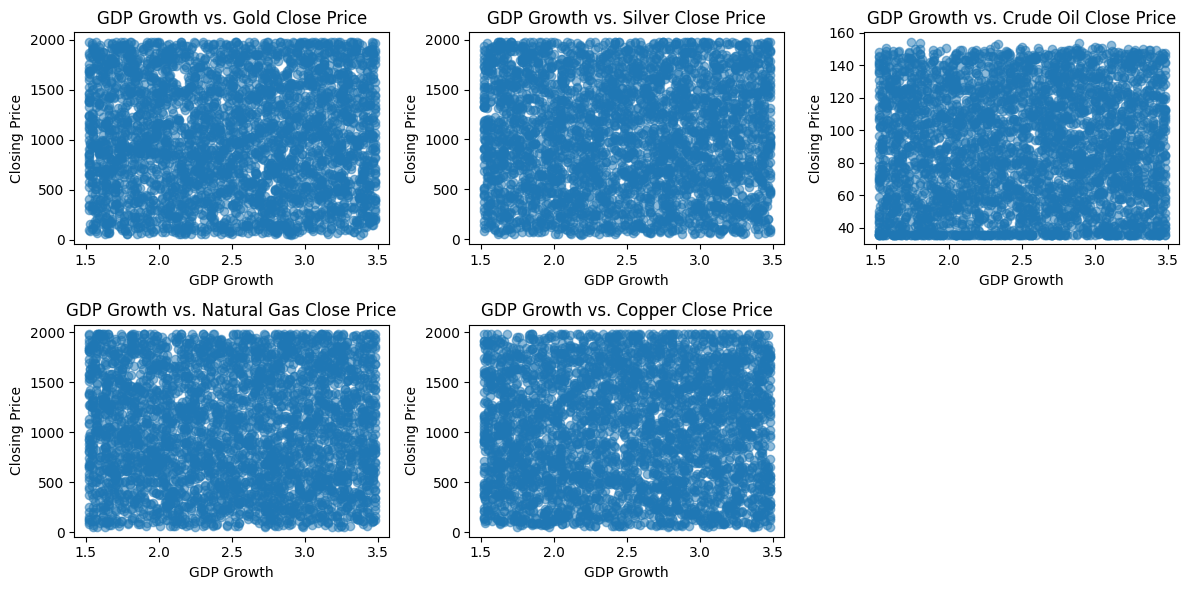

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Commodity price trends over time
plt.figure(figsize=(14, 6))
for commodity in df['Commodity'].unique():
    commodity_data = df[df['Commodity'] == commodity]
    plt.plot(commodity_data['Date'], commodity_data['Close'], label=commodity)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Commodity Price Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


# 2. Correlation between commodity prices
plt.figure(figsize=(10, 8))
commodity_close_prices = df.pivot(index='Date', columns='Commodity', values='Close')
correlation_matrix = commodity_close_prices.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Commodity Prices')
plt.show()

# 3. Distribution of daily price changes
plt.figure(figsize=(12, 6))
for i, commodity in enumerate(df['Commodity'].unique()):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[df['Commodity'] == commodity]['Daily_Price_Change'], kde=True)
    plt.title(f'Daily Price Change Distribution ({commodity})')
plt.tight_layout()
plt.show()

# 4. Impact of 7-day moving average
plt.figure(figsize=(14, 6))
for commodity in df['Commodity'].unique():
    commodity_data = df[df['Commodity'] == commodity]
    plt.plot(commodity_data['Date'], commodity_data['Close'], label=f'{commodity} Close Price')
    plt.plot(commodity_data['Date'], commodity_data['Close_Price_7D_MA'], label=f'{commodity} 7D MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Impact of 7-Day Moving Average on Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# 5. Relationship with Macroeconomic Indicators (Example with GDP Growth)
plt.figure(figsize=(12, 6))
for i, commodity in enumerate(df['Commodity'].unique()):
    plt.subplot(2, 3, i + 1)
    commodity_data = df[df['Commodity'] == commodity]
    plt.scatter(commodity_data['GDP_Growth'], commodity_data['Close'], alpha=0.5)
    plt.title(f'GDP Growth vs. {commodity} Close Price')
    plt.xlabel('GDP Growth')
    plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the trends and patterns in commodity prices, calculating descriptive statistics, identifying correlations, and performing time series analysis where appropriate.


**Reasoning**:
Calculate descriptive statistics for the 'Close' price of each commodity, analyze the correlation between different commodity prices and visualize it as a heatmap, and perform time series analysis on the 'Close' prices.



,mean,median,std,min,max
Commodity,,,,,
Copper,1021.761766,1029.240,562.294000,49.51,1977.6093
Crude Oil,90.198470,89.770,34.439643,35.74,154.4000
Gold,1026.270123,1007.670,560.021813,50.12,1977.6093
Natural Gas,1023.407557,1002.735,560.245038,50.93,1977.6093
Silver,1027.078464,1022.130,557.896927,46.10,1977.6093


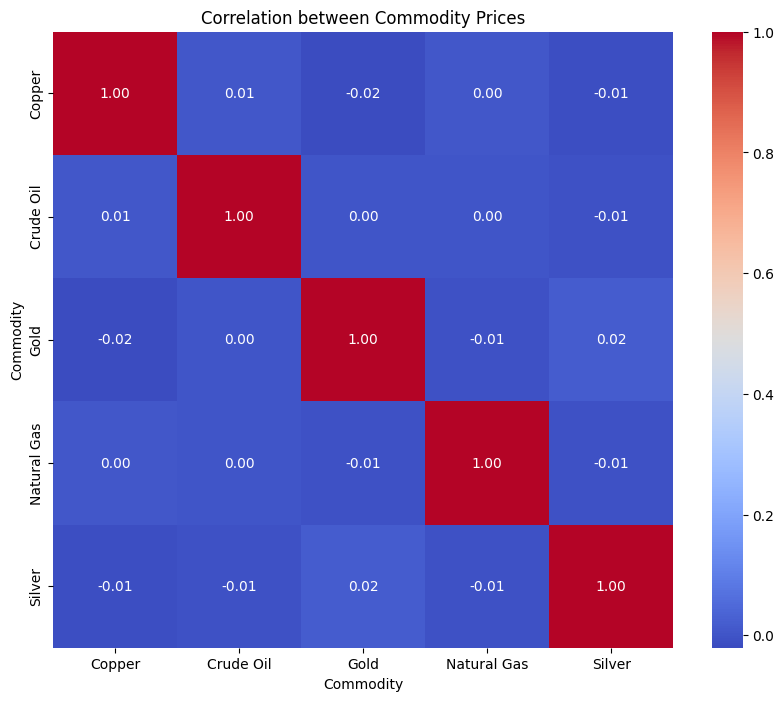

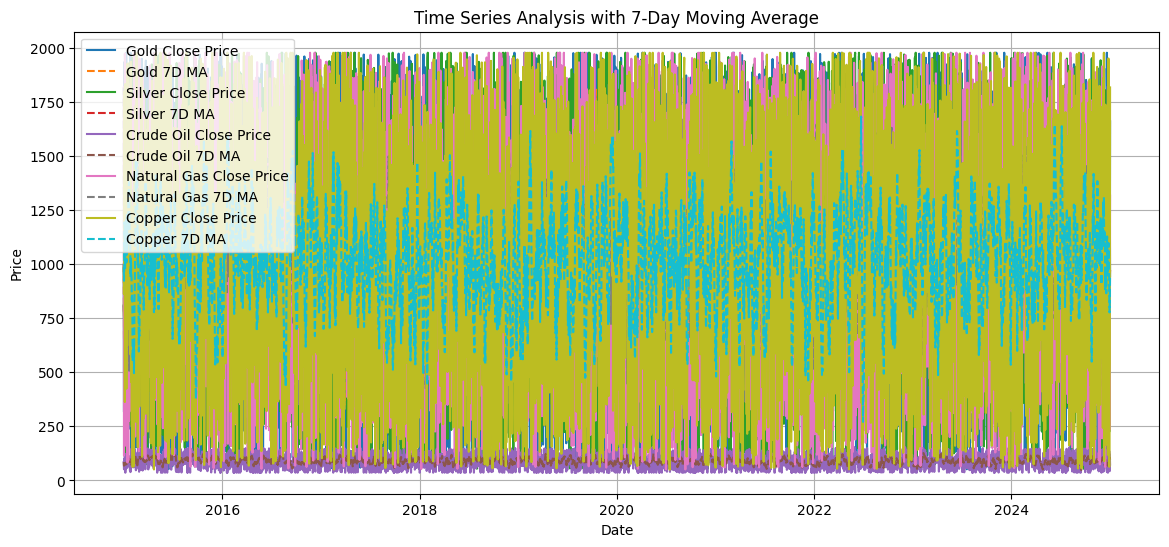

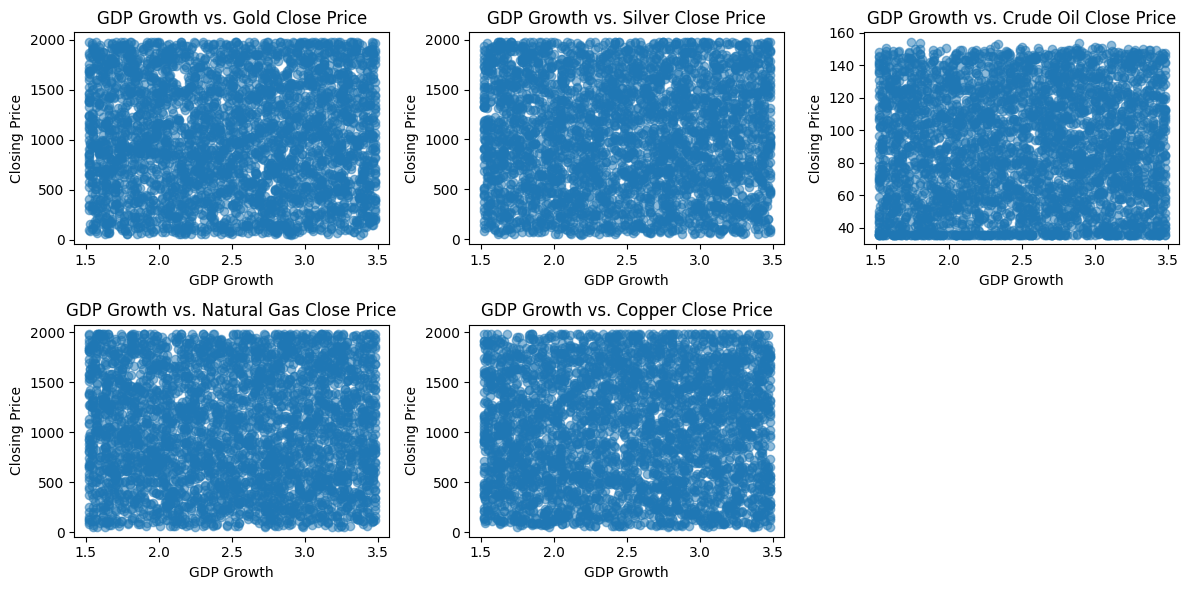

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Descriptive statistics for 'Close' price
descriptive_stats = df.groupby('Commodity')['Close'].agg(['mean', 'median', 'std', 'min', 'max'])
display(descriptive_stats)

# 2. Correlation between commodity prices
plt.figure(figsize=(10, 8))
commodity_close_prices = df.pivot(index='Date', columns='Commodity', values='Close')
correlation_matrix = commodity_close_prices.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Commodity Prices')
plt.show()

# 3. Time series analysis (example: moving average) - already calculated
# Plot the time series and moving averages
plt.figure(figsize=(14, 6))
for commodity in df['Commodity'].unique():
    commodity_data = df[df['Commodity'] == commodity]
    plt.plot(commodity_data['Date'], commodity_data['Close'], label=f'{commodity} Close Price')
    plt.plot(commodity_data['Date'], commodity_data['Close_Price_7D_MA'], label=f'{commodity} 7D MA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Analysis with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

#Further time series analysis can be performed here (e.g., exponential smoothing, decomposition).


# Example:  Correlation with Macroeconomic Indicators
plt.figure(figsize=(12, 6))
for i, commodity in enumerate(df['Commodity'].unique()):
    plt.subplot(2, 3, i + 1)
    commodity_data = df[df['Commodity'] == commodity]
    plt.scatter(commodity_data['GDP_Growth'], commodity_data['Close'], alpha=0.5)
    plt.title(f'GDP Growth vs. {commodity} Close Price')
    plt.xlabel('GDP Growth')
    plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()



---

